# 6.2. Exploring Relationships - Unemployment in America

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

#### Note about matplotlib:

There are certain bugs associated with some versions of matplotlib. Before you start your analysis, you should check what version you have by typing `matplotlib.__version__` in a Jupyter cell and executing it. If it shows version 3.1.1, you'll likely experience some problems with the way the heatmap appears.

To circumvent this, we recommend opening a new Anaconda terminal and executing this command: `conda update --all`. This will update all of your packages and install the newest version of matplotlib, where this bug has been fixed. 

Then, restart the kernel for your notebook (so it can pick up any changes to your library versions) and rerun your code, which will re-import the libraries in your notebook. Check the version again, and you should have the latest version installed.

In [3]:
matplotlib.__version__

'3.5.2'

In [4]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
# Define path

path = r'C:\Users\eminc\OneDrive\A  - Career Foundry\Data Immersion\A6 Advanced Analytics & Dashboard Design\6.0. - Project'

In [6]:
# Import data

df = pd.read_csv(os.path.join(path, '6 - 02 Data','Prepared Data','Unemploy3.csv'))

### 2. Data Cleaning

#### Renaming Columns:

In [7]:
df.shape

(29892, 13)

In [8]:
df.columns

Index(['FIPS Code', 'State/Area', 'Year', 'Month', 'Month/Year', 'Year/Month',
       'Total Civilian Non-Institutional Population in State/Area',
       'Total Civilian Labor Force in State/Area',
       '    Percent (%) of State/Areas Population    ',
       'Total Employment in State/Area',
       '    Percent (%) of Labor Force Employed in State/Area    ',
       'Total Unemployment in State/Area',
       '    Percent (%) of Labor Force Unemployed in State/Area    '],
      dtype='object')

In [9]:
df.dtypes

FIPS Code                                                        int64
State/Area                                                      object
Year                                                             int64
Month                                                            int64
Month/Year                                                      object
Year/Month                                                      object
Total Civilian Non-Institutional Population in State/Area        int64
Total Civilian Labor Force in State/Area                         int64
    Percent (%) of State/Areas Population                      float64
Total Employment in State/Area                                   int64
    Percent (%) of Labor Force Employed in State/Area          float64
Total Unemployment in State/Area                                 int64
    Percent (%) of Labor Force Unemployed in State/Area        float64
dtype: object

In [10]:
df.head()

,FIPS Code,State/Area,Year,Month,Month/Year,Year/Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Areas Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,1/1976,1976/1,2605000,1484555,57.0,1386023,53.2,98532,6.6
1,2,Alaska,1976,1,1/1976,1976/1,232000,160183,69.0,148820,64.1,11363,7.1
2,4,Arizona,1976,1,1/1976,1976/1,1621000,964120,59.5,865871,53.4,98249,10.2
3,5,Arkansas,1976,1,1/1976,1976/1,1536000,889044,57.9,824395,53.7,64649,7.3
4,6,California,1976,1,1/1976,1976/1,15621000,9774280,62.6,8875685,56.8,898595,9.2


In [11]:
df.columns

Index(['FIPS Code', 'State/Area', 'Year', 'Month', 'Month/Year', 'Year/Month',
       'Total Civilian Non-Institutional Population in State/Area',
       'Total Civilian Labor Force in State/Area',
       '    Percent (%) of State/Areas Population    ',
       'Total Employment in State/Area',
       '    Percent (%) of Labor Force Employed in State/Area    ',
       'Total Unemployment in State/Area',
       '    Percent (%) of Labor Force Unemployed in State/Area    '],
      dtype='object')

In [12]:
df.rename(columns = {'Total Civilian Non-Institutional Population in State/Area' : 'Population'}, inplace = True)

In [13]:
df.rename(columns = {'Total Civilian Labor Force in State/Area' : 'Labor Force'}, inplace = True)

In [14]:
df.rename(columns = {'    Percent (%) of State/Areas Population    ' : 'LF % of Population'}, inplace = True)

In [15]:
df.rename(columns = {'Total Employment in State/Area': 'Employment'}, inplace = True)

In [16]:
df.rename(columns = {'    Percent (%) of Labor Force Employed in State/Area    ' : '% of Employed'}, inplace = True)

In [17]:
df.rename(columns = {'Total Unemployment in State/Area': 'Unemployment'}, inplace = True)

In [18]:
df.rename(columns = {'    Percent (%) of Labor Force Unemployed in State/Area    ' : '% of Unemployed'}, inplace = True)

In [19]:
df.head()

,FIPS Code,State/Area,Year,Month,Month/Year,Year/Month,Population,Labor Force,LF % of Population,Employment,% of Employed,Unemployment,% of Unemployed
0,1,Alabama,1976,1,1/1976,1976/1,2605000,1484555,57.0,1386023,53.2,98532,6.6
1,2,Alaska,1976,1,1/1976,1976/1,232000,160183,69.0,148820,64.1,11363,7.1
2,4,Arizona,1976,1,1/1976,1976/1,1621000,964120,59.5,865871,53.4,98249,10.2
3,5,Arkansas,1976,1,1/1976,1976/1,1536000,889044,57.9,824395,53.7,64649,7.3
4,6,California,1976,1,1/1976,1976/1,15621000,9774280,62.6,8875685,56.8,898595,9.2


#### Changing Variable's Data Type: 

In [20]:
df.dtypes

FIPS Code               int64
State/Area             object
Year                    int64
Month                   int64
Month/Year             object
Year/Month             object
Population              int64
Labor Force             int64
LF % of Population    float64
Employment              int64
% of Employed         float64
Unemployment            int64
% of Unemployed       float64
dtype: object

In [21]:
df['FIPS Code'] = df['FIPS Code'].astype('str')

In [22]:
df['Month'] = df['Month'].astype('str')

In [23]:
df.dtypes

FIPS Code              object
State/Area             object
Year                    int64
Month                  object
Month/Year             object
Year/Month             object
Population              int64
Labor Force             int64
LF % of Population    float64
Employment              int64
% of Employed         float64
Unemployment            int64
% of Unemployed       float64
dtype: object

#### Missing Values Check:

In [24]:
# Check for missing values

df.isnull().sum() # No missing values!

FIPS Code             0
State/Area            0
Year                  0
Month                 0
Month/Year            0
Year/Month            0
Population            0
Labor Force           0
LF % of Population    0
Employment            0
% of Employed         0
Unemployment          0
% of Unemployed       0
dtype: int64

#### Duplicates Check:

In [25]:
# Find duplicates

df_dups = df[df.duplicated()]

In [26]:
df_dups.shape # No duplicates!

(0, 13)

In [27]:
df_dups

,FIPS Code,State/Area,Year,Month,Month/Year,Year/Month,Population,Labor Force,LF % of Population,Employment,% of Employed,Unemployment,% of Unemployed


#### Mixed-Type Data:

In [28]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# No mixed-type columns either!

### 3. Exploring Relationships

### Correlations:

In [29]:
# Check the final version of data first

df.describe()

,Year,Population,Labor Force,LF % of Population,Employment,% of Employed,Unemployment,% of Unemployed
count,29892.000000,2.989200e+04,2.989200e+04,29892.000000,2.989200e+04,29892.000000,2.989200e+04,29892.000000
mean,1999.000000,4.235528e+06,2.734826e+06,65.516202,2.565279e+06,61.670417,1.695473e+05,5.920788
std,13.564887,4.603808e+06,2.942369e+06,4.304355,2.748895e+06,4.739074,2.145427e+05,2.207521
min,1976.000000,2.320000e+05,1.600220e+05,51.000000,1.487180e+05,41.600000,4.980000e+03,1.900000
25%,1987.000000,1.103986e+06,7.318940e+05,62.800000,6.795922e+05,58.600000,3.737100e+04,4.300000
50%,1999.000000,2.934918e+06,1.878042e+06,65.900000,1.750450e+06,61.800000,1.039425e+05,5.500000
75%,2011.000000,5.390502e+06,3.417254e+06,68.500000,3.230634e+06,65.100000,2.102450e+05,7.100000
max,2022.000000,3.123644e+07,1.960070e+07,75.700000,1.875432e+07,73.100000,3.018611e+06,30.600000


In [30]:
# Create a correlation matrix using pandas

df.corr()

,Year,Population,Labor Force,LF % of Population,Employment,% of Employed,Unemployment,% of Unemployed
Year,1.000000,0.137770,0.131718,-0.087821,0.136854,-0.003079,0.052964,-0.244724
Population,0.137770,1.000000,0.997937,-0.202443,0.997107,-0.214452,0.910569,0.130756
Labor Force,0.131718,0.997937,1.000000,-0.159162,0.999469,-0.173580,0.908608,0.117499
LF % of Population,-0.087821,-0.202443,-0.159162,1.000000,-0.154582,0.959482,-0.202225,-0.350434
Employment,0.136854,0.997107,0.999469,-0.154582,1.000000,-0.163269,0.894511,0.095926
% of Employed,-0.003079,-0.214452,-0.173580,0.959482,-0.163269,1.000000,-0.288646,-0.599162
Unemployment,0.052964,0.910569,0.908608,-0.202225,0.894511,-0.288646,1.000000,0.382370
% of Unemployed,-0.244724,0.130756,0.117499,-0.350434,0.095926,-0.599162,0.382370,1.000000


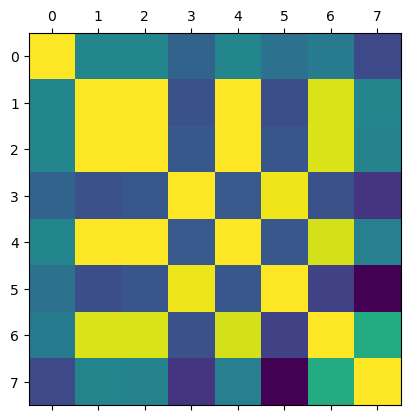

In [31]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

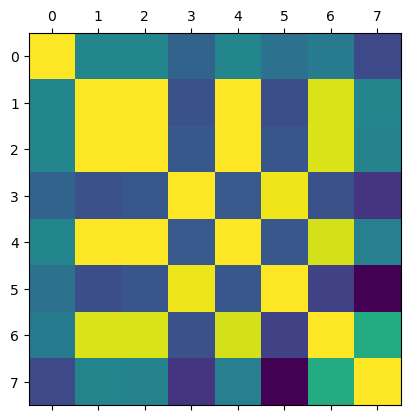

In [32]:
# Save figure
plt.matshow(df.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

In [33]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\eminc\\OneDrive\\A  - Career Foundry\\Data Immersion\\A6 Advanced Analytics & Dashboard Design\\6.0. - Project\\6 - 03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

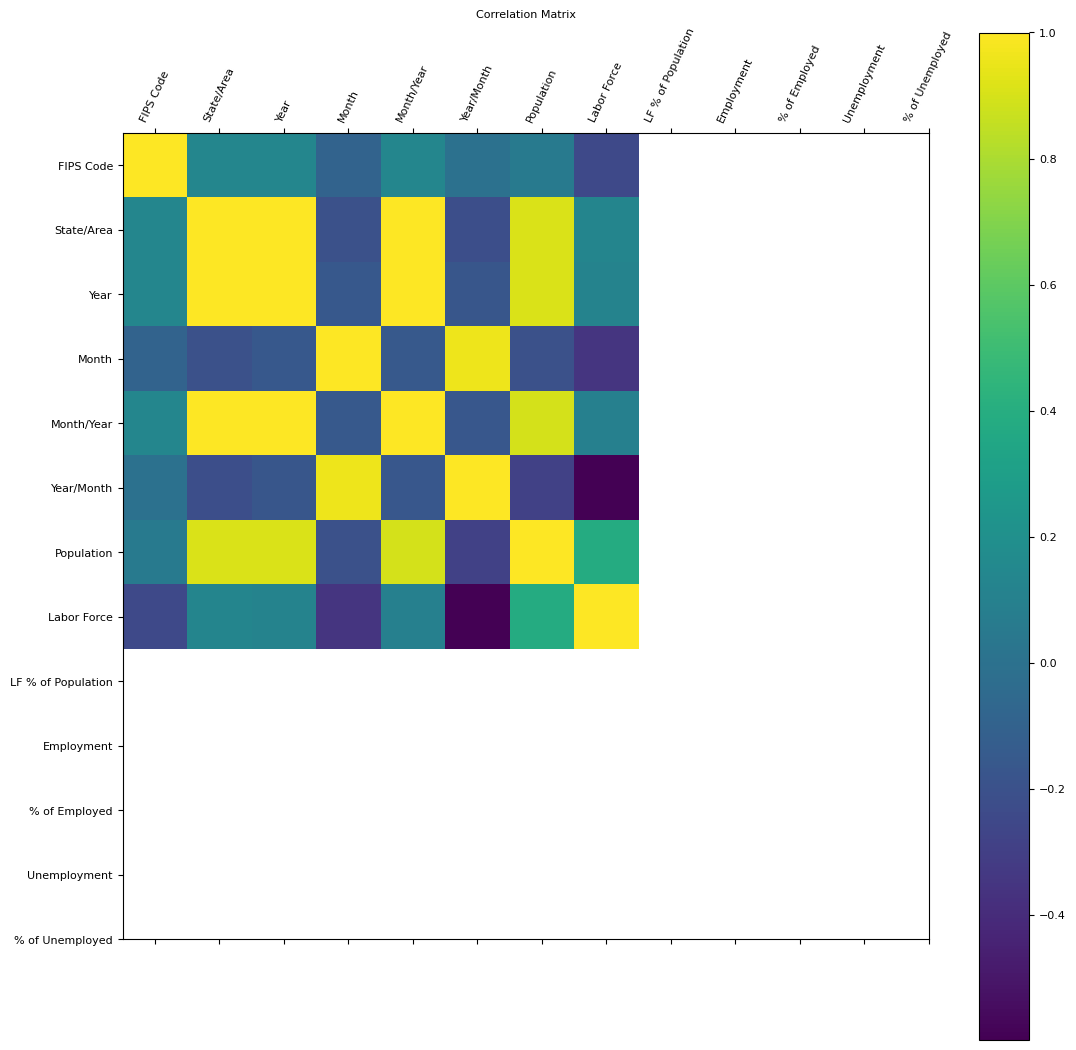

In [34]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(13, 13)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=65) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=8) # add font size
plt.title('Correlation Matrix', fontsize=8) # add title

#### Create a correlation heatmap using seaborn:

In [35]:
df.columns

Index(['FIPS Code', 'State/Area', 'Year', 'Month', 'Month/Year', 'Year/Month',
       'Population', 'Labor Force', 'LF % of Population', 'Employment',
       '% of Employed', 'Unemployment', '% of Unemployed'],
      dtype='object')

In [36]:
# Create a subset excluding the "FIPS Code", "State/Area" and Time" columns

sub = df[['Population', 'Labor Force', 'LF % of Population', 'Employment',
       '% of Employed', 'Unemployment', '% of Unemployed']]

In [37]:
sub

,Population,Labor Force,LF % of Population,Employment,% of Employed,Unemployment,% of Unemployed
0,2605000,1484555,57.0,1386023,53.2,98532,6.6
1,232000,160183,69.0,148820,64.1,11363,7.1
2,1621000,964120,59.5,865871,53.4,98249,10.2
3,1536000,889044,57.9,824395,53.7,64649,7.3
4,15621000,9774280,62.6,8875685,56.8,898595,9.2
...,...,...,...,...,...,...,...
29887,6862585,4470272,65.1,4330531,63.1,139741,3.1
29888,6254253,4015286,64.2,3832769,61.3,182517,4.5
29889,1434789,784323,54.7,752464,52.4,31859,4.1
29890,4753700,3068610,64.6,2976670,62.6,91940,3.0


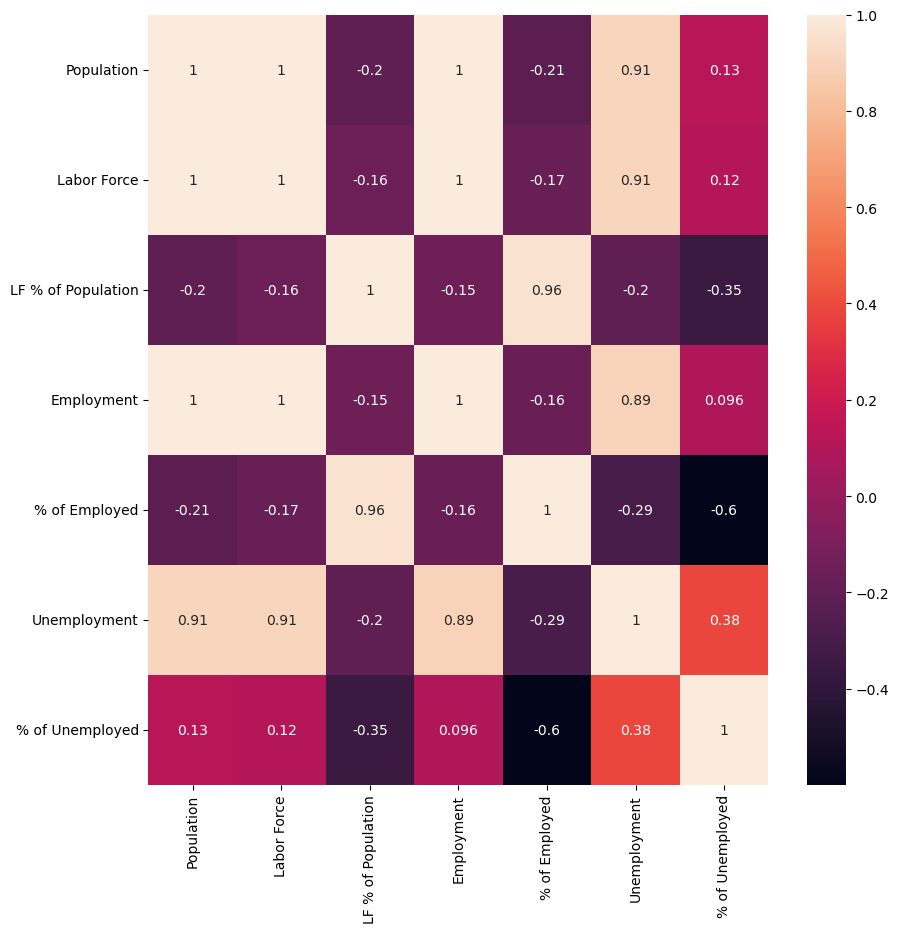

In [38]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Answer of Q3: Relationship is strong, then the coefficient between two variables is between 0.5 - 1.0. / 0.3 - 0.5 moderate / 0.1 - 0.3. weak and 0 means no relationship. In this heatmap above relationship between Labor Force and Unemployment is strong. Coefficient is 0.91.

### Scatterplots:


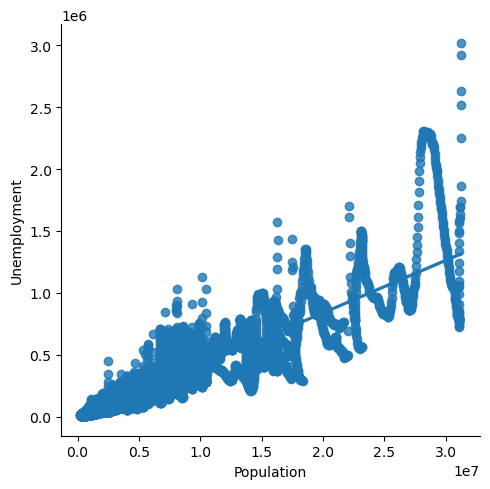

In [39]:
# Create a scatterplot for the "Population" and "Unemployment" columns in seaborn

sns.lmplot(x = 'Population', y = 'Unemployment', data = df)

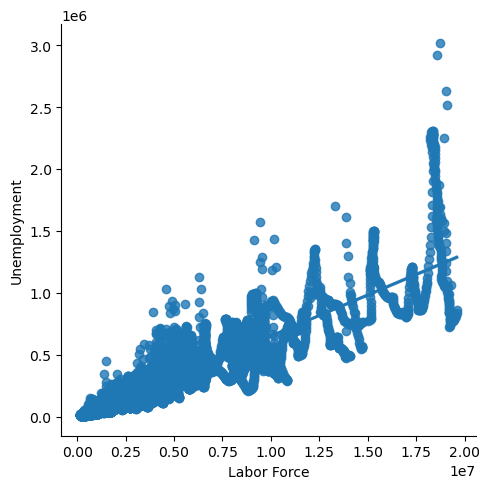

In [40]:
# Create a scatterplot for the "Employment" and "Unemployment" columns in seaborn

sns.lmplot(x = 'Labor Force', y = 'Unemployment', data = df)

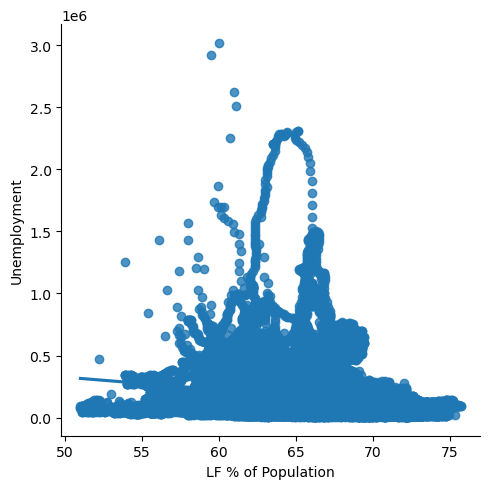

In [41]:
# Create a scatterplot for the "LF % of Population" and "Unemployment" columns in seaborn

sns.lmplot(x = 'LF % of Population', y = 'Unemployment', data = df)

### Answer of Q4: Strong correlation is between Population and Unemployment. Also strong correlation between                                    Labor Force and Unemployment.

### Pair Plots:

In [42]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['Labor Force', 'Unemployment']]

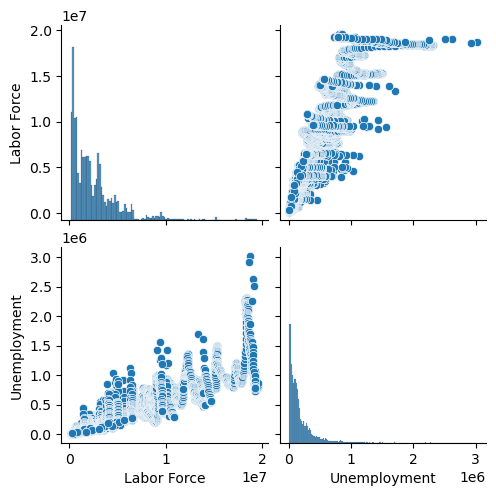

In [43]:
# Create a pair plot 

g = sns.pairplot(sub_2)

In [44]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['LF % of Population', '% of Employed']]

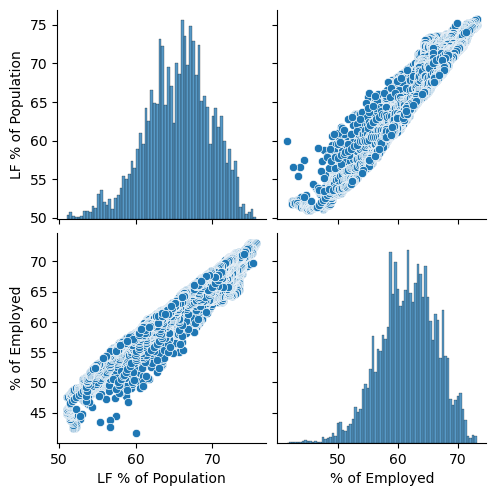

In [45]:
# Create a pair plot 

g = sns.pairplot(sub_2)

### Strong correlation between Percentage of Labor Force of Population and Percentage of Employed. The higer or lower the one varibale the higeror lower the other one. Will also pick Labor Force and Unemployment quantities for further deep dive.

### Categorical Plots:

#### Creating a categorical variable that splits the % of Unemployed column into categories:

In [46]:
df.columns

Index(['FIPS Code', 'State/Area', 'Year', 'Month', 'Month/Year', 'Year/Month',
       'Population', 'Labor Force', 'LF % of Population', 'Employment',
       '% of Employed', 'Unemployment', '% of Unemployed'],
      dtype='object')

<AxesSubplot:xlabel='% of Unemployed', ylabel='Count'>

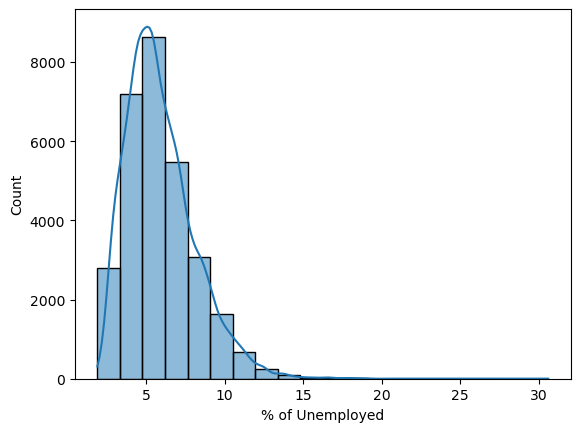

In [47]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the Unemployment rates. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['% of Unemployed'], bins = 20, kde = True)

In [48]:
df.loc[df['% of Unemployed'] < 3.5, 'Unemployment Categories'] = 'Low Unemployment'

In [49]:
df.loc[(df['% of Unemployed'] >= 3.5) & (df['% of Unemployed'] < 8), 'Unemployment Categories'] = 'Mid Unemployment'

In [50]:
df.loc[df['% of Unemployed'] >= 8, 'Unemployment Categories'] = 'High Unemployment'

In [51]:
df['Unemployment Categories'].value_counts(dropna = False)

Mid Unemployment     21707
High Unemployment     5021
Low Unemployment      3164
Name: Unemployment Categories, dtype: int64

In [52]:
df['Unemployment Categories'] = df['Unemployment Categories'].astype('str')

In [53]:
df.dtypes

FIPS Code                   object
State/Area                  object
Year                         int64
Month                       object
Month/Year                  object
Year/Month                  object
Population                   int64
Labor Force                  int64
LF % of Population         float64
Employment                   int64
% of Employed              float64
Unemployment                 int64
% of Unemployed            float64
Unemployment Categories     object
dtype: object

In [54]:
df.columns

Index(['FIPS Code', 'State/Area', 'Year', 'Month', 'Month/Year', 'Year/Month',
       'Population', 'Labor Force', 'LF % of Population', 'Employment',
       '% of Employed', 'Unemployment', '% of Unemployed',
       'Unemployment Categories'],
      dtype='object')

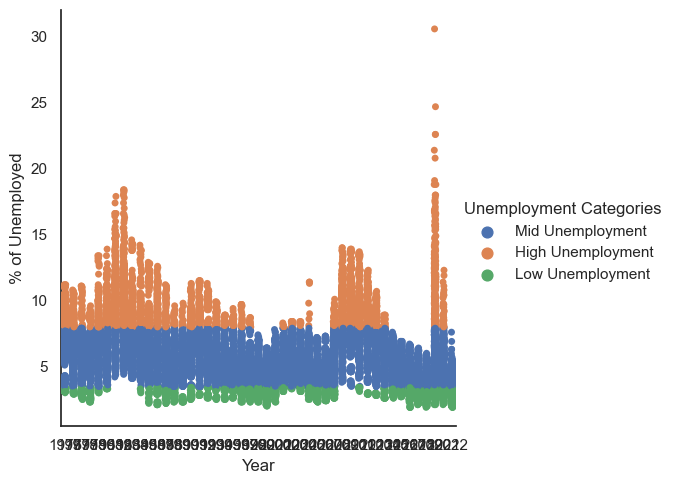

In [55]:
# Create a categorical plot in seaborn using the Unemployment Categories created above

sns.set(style="white")
g = sns.catplot(x="Year", y="% of Unemployed", hue="Unemployment Categories", data=df)

In [56]:
# Need to group year into decades to have a better visibility on the category plot.

In [57]:
df.loc[df['Year'] < 1980, 'Decades'] = '1970s'

In [58]:
df.loc[(df['Year'] >= 1980) & (df['Year'] < 1990), 'Decades'] = '1980s'

In [59]:
df.loc[(df['Year'] >= 1990) & (df['Year'] < 2000), 'Decades'] = '1990s'

In [60]:
df.loc[(df['Year'] >= 2000) & (df['Year'] < 2010), 'Decades'] = '2000s'

In [61]:
df.loc[(df['Year'] >= 2010) & (df['Year'] < 2020), 'Decades'] = '2010s'

In [62]:
df.loc[(df['Year'] >= 2020) , 'Decades'] = '2020s'

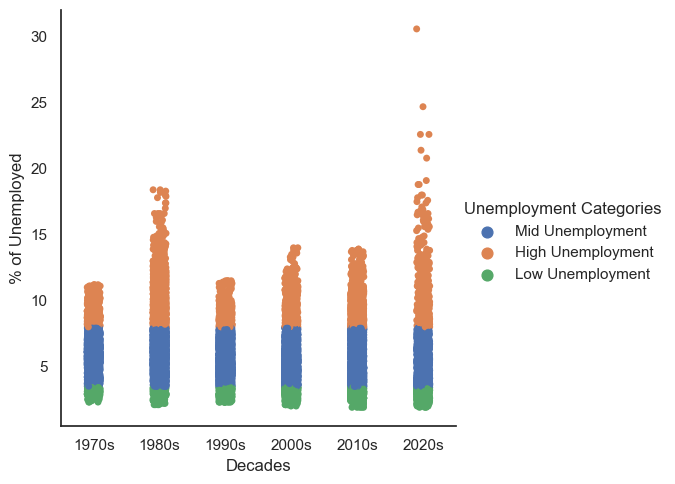

In [63]:
# Create a categorical plot in seaborn using the Unemployment Categories created above

sns.set(style="white")
g = sns.catplot(x="Decades", y="% of Unemployed", hue="Unemployment Categories", data=df)

### Answer to Q6: We can see high unemployment rates in the eightys and 2020s.

### Answer to Q7: How does Labor Force influence the Unemployment rate?

### Answer to Q8: Hypothesis: Economic crises increases Unemployment rate. 

### Answer to Q8: Hypothesis: The higher the Labor Force the lower the % of Unemployed

In [64]:
# fig = g.get_figure()
g.savefig("out.png") 

# Again, the image will be saved in the working directory. 

In [65]:
df.shape

(29892, 15)

In [66]:
df.to_csv(os.path.join(path, '6 - 02 Data', 'Prepared Data', 'Unemployment in America.csv'))